### Eluvio DS Challenge Option 1
#### Created by Chun Yin KONG

In [1]:
## Importing modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
## reading data
data = pd.read_csv("Eluvio_DS_Challenge.csv")

### Understanding the data set

In [3]:
data.head()

,time_created,date_created,up_votes,down_votes,title,over_18,author,category
0,1201232046,2008-01-25,3,0,Scores killed in Pakistan clashes,False,polar,worldnews
1,1201232075,2008-01-25,2,0,Japan resumes refuelling mission,False,polar,worldnews
2,1201232523,2008-01-25,3,0,US presses Egypt on Gaza border,False,polar,worldnews
3,1201233290,2008-01-25,1,0,Jump-start economy: Give health care to all,False,fadi420,worldnews
4,1201274720,2008-01-25,4,0,Council of Europe bashes EU&UN terror blacklist,False,mhermans,worldnews


In [4]:
data.shape

(509236, 8)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 509236 entries, 0 to 509235
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   time_created  509236 non-null  int64 
 1   date_created  509236 non-null  object
 2   up_votes      509236 non-null  int64 
 3   down_votes    509236 non-null  int64 
 4   title         509236 non-null  object
 5   over_18       509236 non-null  bool  
 6   author        509236 non-null  object
 7   category      509236 non-null  object
dtypes: bool(1), int64(3), object(4)
memory usage: 27.7+ MB


In [6]:
data.describe()

,time_created,up_votes,down_votes
count,5.092360e+05,509236.000000,509236.0
mean,1.380240e+09,112.236283,0.0
std,7.090436e+07,541.694675,0.0
min,1.201232e+09,0.000000,0.0
25%,1.341585e+09,1.000000,0.0
50%,1.392909e+09,5.000000,0.0
75%,1.436527e+09,16.000000,0.0
max,1.479817e+09,21253.000000,0.0


In [7]:
data['over_18'].value_counts()

False    508916
True        320
Name: over_18, dtype: int64

In [8]:
data.isnull().any()

time_created    False
date_created    False
up_votes        False
down_votes      False
title           False
over_18         False
author          False
category        False
dtype: bool

In [9]:
col_list = list(data)
drop_col_list = []
for col_names in col_list:
    if len(data[str(col_names)].unique()) - 1 == 0:
        print(str(col_names), ": all duplicated values")
        drop_col_list.append(str(col_names))
    else:
        print(str(col_names), ": has unique values")

time_created : has unique values
date_created : has unique values
up_votes : has unique values
down_votes : all duplicated values
title : has unique values
over_18 : has unique values
author : has unique values
category : all duplicated values


## Data processing

In [10]:
data = data.drop(drop_col_list, axis=1)

In [11]:
# after dropping all duplicated value's column
data.head()

,time_created,date_created,up_votes,title,over_18,author
0,1201232046,2008-01-25,3,Scores killed in Pakistan clashes,False,polar
1,1201232075,2008-01-25,2,Japan resumes refuelling mission,False,polar
2,1201232523,2008-01-25,3,US presses Egypt on Gaza border,False,polar
3,1201233290,2008-01-25,1,Jump-start economy: Give health care to all,False,fadi420
4,1201274720,2008-01-25,4,Council of Europe bashes EU&UN terror blacklist,False,mhermans


In [12]:
# Create label to determine popularity based on 75% percentile
def label_attractive (row):
    if row['up_votes'] >= 16 : 
        return True
    else:
        return False

In [13]:
data['attractive_news'] = data.apply(lambda row: label_attractive(row), axis=1)

In [14]:
data.head()

,time_created,date_created,up_votes,title,over_18,author,attractive_news
0,1201232046,2008-01-25,3,Scores killed in Pakistan clashes,False,polar,False
1,1201232075,2008-01-25,2,Japan resumes refuelling mission,False,polar,False
2,1201232523,2008-01-25,3,US presses Egypt on Gaza border,False,polar,False
3,1201233290,2008-01-25,1,Jump-start economy: Give health care to all,False,fadi420,False
4,1201274720,2008-01-25,4,Council of Europe bashes EU&UN terror blacklist,False,mhermans,False


In [15]:
data['attractive_news'].value_counts()

False    381073
True     128163
Name: attractive_news, dtype: int64

## Data Visualization

Text(5, 100000, '50 Percentile')

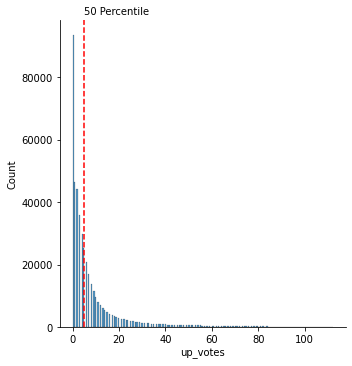

In [16]:
sns.displot(data, x=data[data['up_votes']<=112]['up_votes'], bins=200)
plt.axvline(5, linestyle = '--', c='red')
plt.text(5,100000, "50 Percentile")

## Title Pre-Processing

In [17]:
import nltk
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
import re

In [18]:
lemma=WordNetLemmatizer() 
stopwords_en = stopwords.words('english')

def text_process (text):
    text = text['title']
    text = re.sub(r"\'r", "", text)
    text = re.sub(r"\'n", "", text)
    text = re.sub(r"\'s", " ", text)
    text = re.sub(r",", " ", text)
    text = re.sub(r"\.", "", text)
    text = re.sub(r"\^", " ^ ", text)
    text = re.sub(r"U of", "University of", text)
    text = re.sub(r"N Korea", "NorthKorea", text)
    text = re.sub(r"'", " ", text)
    text = re.sub(r"(\d+)(k)", r"\g<1>000", text)
    text = re.sub(r" ", "", text)
    text = re.sub(r"@\S+", "", text)

    word=nltk.word_tokenize(text.lower())
    new_word=[w for w in word if w not in stopwords_en and w.isalpha()]
    new_word=[lemma.lemmatize(w, "v") for w in new_word]
    sentence = (" ").join(new_word)
    return sentence

## Algorithms for Classification

### Dataset Pre-Processing to reduce RAM usage

In [19]:
from random import sample
import random
random.seed(2021)
data_filtered = data[data['up_votes']<=np.percentile(data['up_votes'], 90)]
data_sampled = data_filtered.sample(frac=0.04)
len(data_sampled)

18336

In [20]:
data_sampled['attractive_news'].value_counts()

False    15179
True      3157
Name: attractive_news, dtype: int64

In [21]:
from sklearn.model_selection import train_test_split

title = data_sampled.apply(lambda text: text_process(text), axis=1).values
label = data_sampled['attractive_news'].values

title_train, title_test, label_train, label_test = train_test_split(title, label, test_size=0.2, random_state=42)

In [22]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
vectorizer.fit(title_train)

title_train = vectorizer.fit_transform(title_train)
title_test = vectorizer.transform(title_test)
title_train

<14668x13530 sparse matrix of type '<class 'numpy.int64'>'
	with 14366 stored elements in Compressed Sparse Row format>

### Testing using Logistic Regression

In [23]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression()
classifier.fit(title_train, label_train)
score = classifier.score(title_test, label_test)

In [24]:
print("Accuracy", score)

Accuracy 0.836423118865867


### Testing using kNN

In [25]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()  
knn.fit(title_train,label_train)         

label_test_predicted = knn.predict(np.array(label_test).reshape(1, -1))

#accuracy = metrics.accuracy_score(np.array(label_test).reshape(1, -1), label_test_predicted)
#print("Accuracy", accuracy)

ValueError: Incompatible dimension for X and Y matrices: X.shape[1] == 3668 while Y.shape[1] == 13530

### Building Simple Neural Network

In [32]:
from keras.models import Sequential
from keras import layers

input_dim = title_train.shape[1]

model = Sequential()
model.add(layers.Dense(10, input_dim=input_dim, activation='relu'))
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                135310    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 11        
Total params: 135,431
Trainable params: 135,431
Non-trainable params: 0
_________________________________________________________________


In [33]:
history = model.fit(title_train, label_train,
                    epochs=25,
                    verbose=False,
                    validation_data=(title_test, label_test),
                    batch_size=64)

In [34]:
from keras.backend import clear_session
clear_session()

In [35]:
loss, accuracy = model.evaluate(title_train, label_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(title_test, label_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Training Accuracy: 0.9496
Testing Accuracy:  0.8318


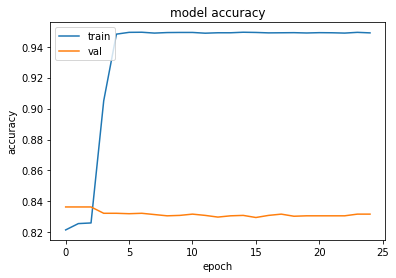

In [36]:
# Plotting training and testing accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

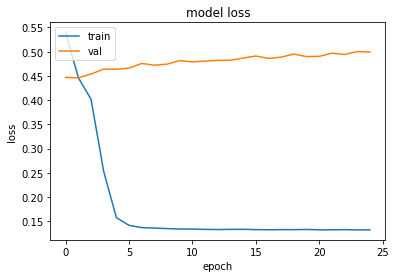

In [37]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()